## This portion of the code is for the EDA and summary statistics for the shipment/prescription data

In [2]:
# import the packages
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Load the data
df = pd.read_csv('prescription_data_grouped_1.csv')
df.head()

,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
0,AR,ACCOMACK,2006,0.0
1,AR,ACCOMACK,2007,0.0
2,AR,ACCOMACK,2008,0.0
3,AR,ACCOMACK,2009,0.0
4,AR,ACCOMACK,2010,0.0


In [9]:
df.shape

(217008, 4)

In [10]:
df.columns

Index(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'MME'], dtype='object')

- There are four columns in the dataset: 'BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'MME'
- 'MME' is a unit of measurement for the amount of opioids prescribed

## Summary Statistics

In [11]:
# summary statistics of the shipment/prescription data
df.describe()

,T_YEAR,MME
count,217008.000000,2.170080e+05
mean,2010.000000,2.159311e+03
std,2.581995,3.096134e+04
min,2006.000000,0.000000e+00
25%,2008.000000,0.000000e+00
50%,2010.000000,0.000000e+00
75%,2012.000000,0.000000e+00
max,2014.000000,3.026737e+06


## More Data Exploration

In [12]:
df.BUYER_STATE.unique()

array(['AR', 'CA', 'FL', 'GA', 'HI', 'IA', 'KS', 'MA', 'ME', 'MN', 'MS',
       'MT', 'ND', 'NE', 'NV', 'NY', 'OR', 'SD', 'TX', 'VA', 'WA', 'WY'],
      dtype=object)

In [13]:
df.T_YEAR.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [14]:
year = df.groupby('T_YEAR').sum()
year = year.reset_index()
year

,T_YEAR,MME
0,2006,3.676411e+07
1,2007,4.285865e+07
2,2008,4.857558e+07
3,2009,5.550185e+07
4,2010,6.353837e+07
5,2011,6.145666e+07
6,2012,5.626907e+07
7,2013,5.245988e+07
8,2014,5.116361e+07


In [15]:
year.shape

(9, 2)

<AxesSubplot: title={'center': 'MME change change over the years'}, xlabel='YEAR', ylabel='MME'>

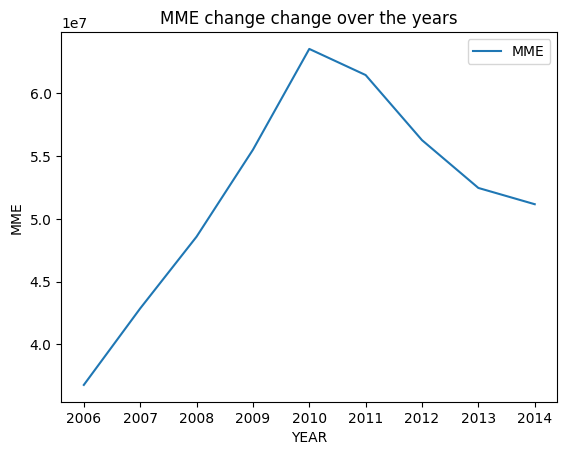

In [16]:
# plot the distribution of the number of prescriptions in MME across the years
year.plot(x='T_YEAR', y='MME', rot=0, title="MME change change over the years", xlabel="YEAR", ylabel="MME")


- From the plot above, we can see that after 2010, the slope of the MME is decreasing and was increaseing before the policy intervention before 2010.

In [17]:
buyer_state = df.groupby('BUYER_STATE').sum()
buyer_state = buyer_state.reset_index()
buyer_state = buyer_state.drop(columns = 'T_YEAR')
buyer_state

,BUYER_STATE,MME
0,AR,1.065035e+07
1,CA,8.957648e+07
2,FL,1.034416e+08
3,GA,2.840369e+07
4,HI,3.166082e+06
5,IA,5.289384e+06
6,KS,9.007524e+06
7,MA,1.825626e+07
8,ME,5.440022e+06
9,MN,9.416557e+06


In [18]:
# Plot the distribution of the prescriptions in MME across the states
alt.Chart(buyer_state).mark_bar().encode(
    x='BUYER_STATE',
    y='MME',
    color='BUYER_STATE'
)


alt.Chart(...)

## 2010 is the policy intervention year

### First State: FL

In [19]:
florida = df[df['BUYER_STATE'] == 'FL']
fl_before = florida[florida['T_YEAR'] < 2010][['MME']]
fl_after = florida[florida['T_YEAR'] > 2010][['MME']]
print(f"The MME of Florida before 2010 policy change is {fl_before.sum()[0]} and after 2010 is {fl_after.sum()[0]}")

The MME of Florida before 2010 policy change is 44336764.51167747 and after 2010 is 39108574.047562085


In [20]:
florida.MME.value_counts().sort_values(ascending=True)

156520.697775       1
18677.498782        1
95259.627977        1
114675.221922       1
141281.048185       1
                 ... 
14208.243115        1
13964.081090        1
15658.135788        1
24799.001059        1
0.000000         9262
Name: MME, Length: 603, dtype: int64

In [21]:
florida[florida['T_YEAR'] == 2010].MME.unique()

array([0.00000000e+00, 1.50910786e+05, 2.98214532e+04, 7.39123023e+04,
       2.65510790e+04, 5.08840976e+05, 3.02673684e+06, 2.72243597e+03,
       2.30654247e+05, 1.11738273e+05, 1.44996736e+05, 2.37663780e+05,
       5.46098273e+04, 1.30876212e+04, 2.65711035e+03, 7.65000297e+05,
       1.56708207e+05, 5.47429391e+04, 2.73687637e+03, 8.38436920e+03,
       5.76095828e+03, 6.48944205e+03, 4.31171625e+03, 3.47068283e+03,
       8.86719339e+03, 2.76170153e+04, 3.31289830e+05, 4.57298436e+04,
       2.80156061e+06, 5.00442570e+03, 1.11822905e+05, 1.48595648e+04,
       2.63712502e+03, 1.36340929e+03, 1.77229263e+05, 6.80132833e+05,
       5.62687360e+04, 3.66496524e+04, 1.14164434e+03, 4.02776351e+03,
       3.60934684e+05, 2.16686241e+05, 1.49894562e+05, 1.24276121e+06,
       7.73099666e+04, 5.50383181e+04, 6.14601668e+04, 5.53243303e+04,
       1.11803048e+06, 2.89370503e+05, 1.89769857e+06, 7.61605811e+05,
       1.43805934e+06, 2.85711952e+05, 9.72589206e+04, 1.13272686e+05,
      

In [22]:
florida[florida['T_YEAR'] == 2010].describe()[['MME']]

,MME
count,1.096000e+03
mean,1.824478e+04
std,1.612674e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,3.026737e+06


In [23]:
florida['T_YEAR'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [24]:
assert fl_before.sum()[0] > fl_after.sum()[0]

In [25]:
fl_before.describe()

,MME
count,4.384000e+03
mean,1.011331e+04
std,9.552302e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,2.584508e+06


In [26]:
fl_after.describe()

,MME
count,4.384000e+03
mean,8.920751e+03
std,6.756449e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.533315e+06


In [60]:
df.BUYER_STATE.unique()

array(['AR', 'CA', 'FL', 'GA', 'HI', 'IA', 'KS', 'MA', 'ME', 'MN', 'MS',
       'MT', 'ND', 'NE', 'NV', 'NY', 'OR', 'SD', 'TX', 'VA', 'WA', 'WY'],
      dtype=object)

In [28]:
fl_compare = ['CA','NV','NY']
fl_compare_df = df[df['BUYER_STATE'].isin(fl_compare)]
fl_compare_df_before = fl_compare_df[fl_compare_df['T_YEAR'] < 2010][['MME']]
fl_compare_df_after = fl_compare_df[fl_compare_df['T_YEAR'] > 2010][['MME']]
print(f"The MME of controlled states before 2010 policy change is {fl_compare_df_before.sum()[0]} and after 2010 is {fl_compare_df_after.sum()[0]}")

The MME of controlled states before 2010 policy change is 58033169.604489565 and after 2010 is 76203422.16623467


In [29]:
fl_compare_df.describe()

,T_YEAR,MME
count,29592.000000,2.959200e+04
mean,2010.000000,5.159771e+03
std,2.582033,5.342340e+04
min,2006.000000,0.000000e+00
25%,2008.000000,0.000000e+00
50%,2010.000000,0.000000e+00
75%,2012.000000,0.000000e+00
max,2014.000000,1.847920e+06


In [30]:
# assume larger then, since not much policy change in the controlled states
assert fl_compare_df_before.sum()[0] < fl_compare_df_after.sum()[0]

In [31]:
fl_compare_df_before.describe()

,MME
count,1.315200e+04
mean,4.412498e+03
std,4.621807e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.768168e+06


In [32]:
fl_compare_df_after.describe()

,MME
count,1.315200e+04
mean,5.794056e+03
std,5.885414e+04
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.847920e+06


### Second State: Texas [We are not taking a look at the Texas because of the policy change happened in 2007 and there's not enough information for us to do it. Something applies to the Washington, which started the policy change not until 2012.

In [74]:
taxes = df[df['BUYER_STATE'] == 'TX']
taxes.T_YEAR.unique()
tx_before = taxes[taxes['T_YEAR'] < 2010][['MME']]
tx_after = taxes[taxes['T_YEAR'] > 2010][['MME']]
print(f"The MME of Texas before 2010 policy change is {tx_before.sum()[0]} and after 2010 is {tx_after.sum()[0]}")


The MME of Texas before 2010 policy change is 18644927.060234837 and after 2010 is 22674521.445611097


In [80]:
taxes.describe()

,T_YEAR,MME
count,9864.00000,9.864000e+03
mean,2010.00000,4.742118e+03
std,2.58212,3.821231e+04
min,2006.00000,0.000000e+00
25%,2008.00000,0.000000e+00
50%,2010.00000,0.000000e+00
75%,2012.00000,0.000000e+00
max,2014.00000,1.161009e+06


In [76]:
taxes.T_YEAR.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [77]:
tx_before.sum()[0] > tx_after.sum()[0]

False

There are more MME after the policy intervention

In [78]:
tx_compare = ['AK','CA','GA','NY', 'MO','WY']
tx_compare_df = df[df['BUYER_STATE'].isin(tx_compare)]
tx_compare_df_before = tx_compare_df[tx_compare_df['T_YEAR'] < 2010][['MME']]
tx_compare_df_after = tx_compare_df[tx_compare_df['T_YEAR'] > 2010][['MME']]
print(f"The MME of controlled states before 2010 policy change is {tx_compare_df_before.sum()[0]} and after 2010 is {tx_compare_df_after.sum()[0]}")

The MME of controlled states before 2010 policy change is 62994843.53284811 and after 2010 is 84823015.16558824


In [79]:
tx_compare_df.describe()

,T_YEAR,MME
count,39456.000000,3.945600e+04
mean,2010.000000,4.263550e+03
std,2.582022,4.262118e+04
min,2006.000000,0.000000e+00
25%,2008.000000,0.000000e+00
50%,2010.000000,0.000000e+00
75%,2012.000000,0.000000e+00
max,2014.000000,1.847920e+06
